# Week 6 handin

## 06 Assignment
#### Ex1 create a module containing a class with the following methods:

    1. init(self, url_list)
    2. download(url,filename) raises NotFoundException when url returns 404
    3. multi_download() uses threads to download multiple urls as text and stores filenames as a property
    4. iter() returns an iterator
    5. next() returns the next filename (and stops when there are no more)
    6. urllist_generator() returns a generator to loop through the urls
    7. avg_vowels(text) - a rough estimate on readability returns average number of vowels in the words of the text
    8. hardest_read() returns the filename of the text with the highest vowel score (use all the cpu cores on the computer for this work.

#### Ex2 Create a notebook and import your module from above
    1. Find 10 books on https://www.gutenberg.org/browse/scores/top and download them using an object of the class you just created before
    2. Test the different methods of your class
    3. Make a bar plot with a sorted list of books on x-axis and avg vowels on y-axis

## 02 Status
    I completed all the steps of the exercises.

## 03 Solutions

In [1]:
# Import the modules.
# I'm forced to use sys.path.append to tell python that this is where my modules are - Error occurs otherwise.
import sys
sys.path.append("my_modules")
import my_modules.ex1 as ex1

In [2]:
# Find 10 books on https://www.gutenberg.org/browse/scores/top and download them using an object of the class you just created before

urls = []
urls.append("https://www.gutenberg.org/files/1342/1342-0.txt")
urls.append("https://www.gutenberg.org/files/84/84-0.txt")
urls.append("https://www.gutenberg.org/files/25344/25344-0.txt")
urls.append("https://www.gutenberg.org/files/11/11-0.txt")
urls.append("https://www.gutenberg.org/files/1250/1250-0.txt")
urls.append("https://www.gutenberg.org/files/1952/1952-0.txt")
urls.append("https://www.gutenberg.org/files/98/98-0.txt")
urls.append("https://www.gutenberg.org/files/1080/1080-0.txt")
urls.append("https://www.gutenberg.org/files/43/43-0.txt")
urls.append("https://www.gutenberg.org/files/16/16-0.txt")

iEx1 = ex1.exercise6_1(urls)
iEx1.multi_download(iEx1.url_list)
print(iEx1.filenames)

# 1. init(self, url_list)
# 2. download(url,filename) raises NotFoundException when url returns 404
# 3. multi_download() uses threads to download multiple urls as text and stores filenames as a property

[&#39;1342-0.txt&#39;, &#39;84-0.txt&#39;, &#39;25344-0.txt&#39;, &#39;11-0.txt&#39;, &#39;1250-0.txt&#39;, &#39;1952-0.txt&#39;, &#39;98-0.txt&#39;, &#39;1080-0.txt&#39;, &#39;43-0.txt&#39;, &#39;16-0.txt&#39;]


In [3]:
# Test the different methods of your class

# iter & next example
iter_example = iter(iEx1)
# Same as using "print(next(iter_test))" 3 times in a row.
for file in iter_example:
    print(file)

# 4. iter() returns an iterator
# 5. next() returns the next filename (and stops when there are no more)

1342-0.txt
84-0.txt
25344-0.txt
11-0.txt
1250-0.txt
1952-0.txt
98-0.txt
1080-0.txt
43-0.txt
16-0.txt


In [4]:
# Test the different methods of your class

# urllist_generator() example
for url in iEx1.urllist_generator():
    print(url)
# Alternative:
# [print(x) for x in ex1.urllist_generator()]

# 6. urllist_generator() returns a generator to loop through the urls

https://www.gutenberg.org/files/1342/1342-0.txt
https://www.gutenberg.org/files/84/84-0.txt
https://www.gutenberg.org/files/25344/25344-0.txt
https://www.gutenberg.org/files/11/11-0.txt
https://www.gutenberg.org/files/1250/1250-0.txt
https://www.gutenberg.org/files/1952/1952-0.txt
https://www.gutenberg.org/files/98/98-0.txt
https://www.gutenberg.org/files/1080/1080-0.txt
https://www.gutenberg.org/files/43/43-0.txt
https://www.gutenberg.org/files/16/16-0.txt


In [5]:
# Test the different methods of your class

# avg_vowels(text) example
avg_vowels = iEx1.avg_vowels("This 'er' ein very \nunderlig, Satz ")
print(avg_vowels)

# 7. avg_vowels(text) - a rough estimate on readability returns average number of vowels in the words of the text

1.67


In [6]:
# Test the different methods of your class

# hardest_read() example
hardest_read = iEx1.hardest_read()
print(hardest_read)

# 8. hardest_read() returns the filename of the text with the highest vowel score (use all the cpu cores on the computer for this work.

1080-0.txt


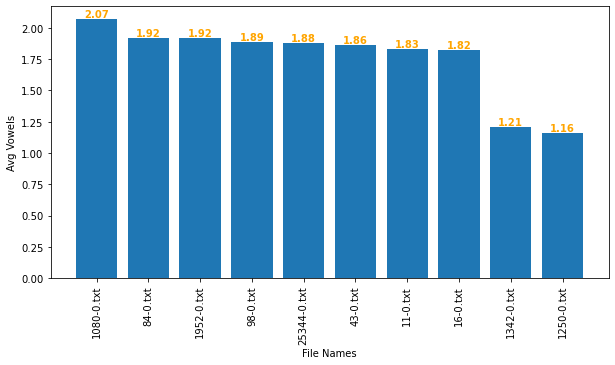

In [7]:
# 3. Make a bar plot with a sorted list of books on x-axis and avg vowels on y-axis
import matplotlib.pylab as plt
from concurrent.futures import ProcessPoolExecutor

with ProcessPoolExecutor(4) as ex:
    result = ex.map(iEx1.avg_vowels, iEx1.__readTextFile__(iEx1.filenames))

res = dict(zip([filename for filename in iEx1.filenames], [avg for avg in result]))

list_of_tuples = sorted(res.items(), key=lambda x:x[1], reverse=True) # sorted by value, return a list of tuples
x, y = zip(*list_of_tuples) # unpack a list of pairs into two tuples

plt.figure(figsize=(10,5))
plt.bar(x, y)
for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', color='orange', weight='bold')
plt.xticks(rotation=90)
plt.xlabel("File Names")
plt.ylabel("Avg Vowels")
plt.show()


